# 성적

## 01.데이터 불러오기


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import cluster

academy=pd.read_csv('/content/academy.csv', encoding='cp949')

## 02.전처리

### 열 명칭 바꾸기 등


In [2]:
academy.columns=['num','kor','math','eng','science','intention']
academy=academy.drop('num',axis=1)
academy.head()

,kor,math,eng,science,intention
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90


In [3]:
print(type(academy))
academy.shape

<class 'pandas.core.frame.DataFrame'>


(52, 5)

### 자료형 변환 (데이터 프래임>>> 넘파이)

In [4]:
academy_arr=np.array(academy)

In [5]:
academy.columns, academy_arr, academy_arr.shape

(Index(['kor', 'math', 'eng', 'science', 'intention'], dtype='object'),
 array([[ 90,  75,  85,  60,  70],
        [ 65,  90,  60,  88,  80],
        [ 45,  53,  48,  50,  60],
        [ 77,  96,  62,  92,  70],
        [ 88,  89,  80,  82,  90],
        [ 90,  92,  90,  96, 100],
        [ 65,  70,  66,  76,  70],
        [ 60,  90,  70,  98,  80],
        [ 46,  56,  43,  55,  60],
        [ 88,  67,  90,  70,  70],
        [ 70,  93,  77,  89,  60],
        [ 99,  80,  95,  70,  80],
        [ 97,  67,  80,  60,  80],
        [ 50,  40,  30,  54,  50],
        [ 90,  77,  92,  60,  70],
        [ 55,  88,  67,  92,  60],
        [ 77,  90,  70,  98,  70],
        [ 90,  89,  80,  92,  90],
        [ 76,  90,  80,  92,  70],
        [ 70,  92,  80,  95,  70],
        [ 76,  75,  70,  82,  80],
        [ 77,  92,  68,  89,  80],
        [ 60,  50,  70,  40,  60],
        [ 54,  70,  56,  72,  60],
        [ 72,  88,  67,  95,  80],
        [ 58,  76,  59,  80,  70],
        [ 88,  60,

## 03.모델학습

In [6]:
model=cluster.KMeans(n_clusters=5)#5개 군집으로 분류
model.fit(academy_arr)

KMeans(n_clusters=5)

In [7]:
model.labels_

array([3, 0, 4, 0, 2, 2, 1, 0, 4, 3, 0, 2, 3, 4, 3, 0, 0, 2, 0, 0, 0, 0,
       4, 1, 0, 1, 3, 2, 1, 3, 0, 2, 3, 3, 4, 1, 0, 2, 2, 1, 3, 2, 3, 1,
       4, 0, 3, 1, 2, 3, 4, 0], dtype=int32)

In [8]:
labels=model.labels_

In [9]:
academy_arr[labels==0]

array([[65, 90, 60, 88, 80],
       [77, 96, 62, 92, 70],
       [60, 90, 70, 98, 80],
       [70, 93, 77, 89, 60],
       [55, 88, 67, 92, 60],
       [77, 90, 70, 98, 70],
       [76, 90, 80, 92, 70],
       [70, 92, 80, 95, 70],
       [76, 75, 70, 82, 80],
       [77, 92, 68, 89, 80],
       [72, 88, 67, 95, 80],
       [66, 90, 70, 88, 70],
       [70, 95, 72, 80, 70],
       [78, 91, 77, 90, 80],
       [65, 90, 70, 92, 70]])

In [10]:
ldata=academy_arr[labels==0]
print(ldata)
print()
print(ldata[:,2])
print(ldata[:,3])

[[65 90 60 88 80]
 [77 96 62 92 70]
 [60 90 70 98 80]
 [70 93 77 89 60]
 [55 88 67 92 60]
 [77 90 70 98 70]
 [76 90 80 92 70]
 [70 92 80 95 70]
 [76 75 70 82 80]
 [77 92 68 89 80]
 [72 88 67 95 80]
 [66 90 70 88 70]
 [70 95 72 80 70]
 [78 91 77 90 80]
 [65 90 70 92 70]]

[60 62 70 77 67 70 80 80 70 68 67 70 72 77 70]
[88 92 98 89 92 98 92 95 82 89 95 88 80 90 92]


## 04.시각화

### 1)Scatter plot

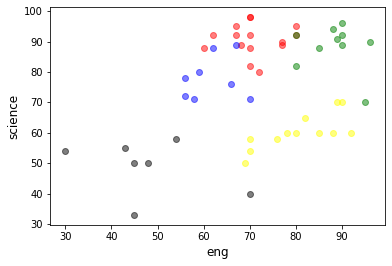

In [11]:
ldata = academy_arr[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3], c='red', alpha=0.5, marker="o")

ldata = academy_arr[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3], c='blue', alpha=0.5, marker="o")

ldata = academy_arr[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3], c='green', alpha=0.5, marker="o")

ldata = academy_arr[labels == 3]
plt.scatter(ldata[:, 2], ldata[:, 3], c='yellow', alpha=0.5, marker="o")

ldata = academy_arr[labels == 4]
plt.scatter(ldata[:, 2], ldata[:, 3], c='black', alpha=0.5, marker="o")

# 축라벨 설정
plt.xlabel(academy.columns[2], fontsize="large")
plt.ylabel(academy.columns[3], fontsize="large")
plt.show()

### 2)댄드로그램

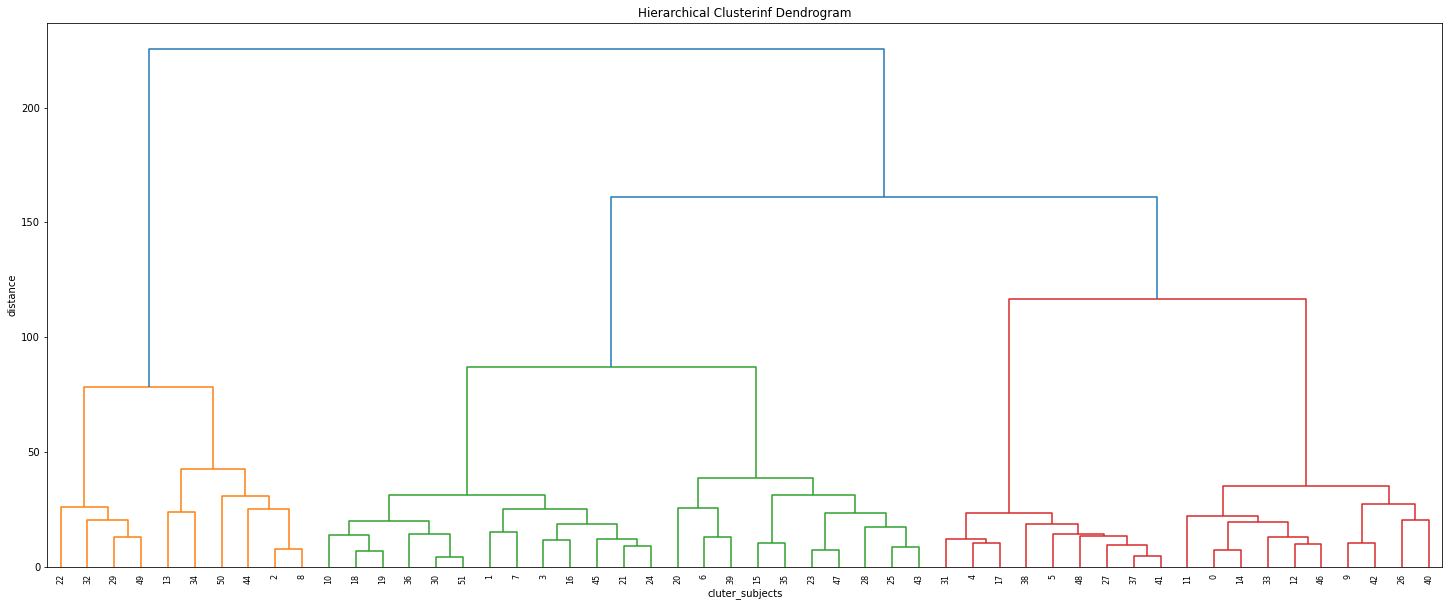

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

z=linkage(academy_arr, 'ward')

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clusterinf Dendrogram')
plt.xlabel('cluter_subjects')
plt.ylabel('distance')

dendrogram(z,
           leaf_rotation=90, #rotaion the x axis labels(각도조절)
           leaf_font_size=8)
plt.show()

# 아이리스 데이터

## 01.데이터 불러오기


In [13]:
from sklearn.cluster import KMeans
from sklearn import cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets 

In [14]:
iris = datasets.load_iris()
data = iris.data

data, data.shape 

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## 02.모델링

In [15]:
model = KMeans(n_clusters=3)##군집을 3개로 생성
model.fit(data)

KMeans(n_clusters=3)

In [16]:
model.labels_ ##군집 확인

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
iris.target # 실제 값( iris 품종 : 3개 0,1,2 정수인코딩 되어 있음)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [19]:
# 각 군집 종(품종) 확인
print("0 cluster:", data[labels == 0])
print()
print("1 cluster:", data[labels == 1])
print()
print("2 cluster:", data[labels == 2])

0 cluster: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]

1 cluster: [[7.  3.2 4.7 1.4]
 [6.4 3

In [20]:
ldata = data[labels == 0]
ldata[:, 2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

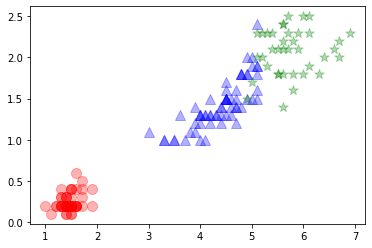

In [21]:
# 그래프 그리기 

ldata = data[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3],
           c='red', alpha=0.3, s=100, marker='o')

ldata = data[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3],
           c='blue', alpha=0.3, s=100, marker='^')

ldata = data[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3],
           c='green', alpha=0.3, s=100, marker='*')

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris.feature_names[2], iris.feature_names[3]

('petal length (cm)', 'petal width (cm)')

Text(0, 0.5, 'petal width (cm)')

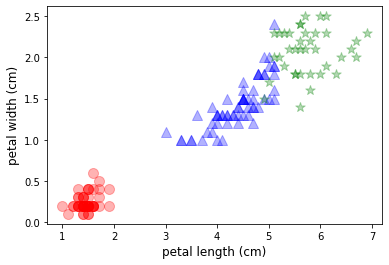

In [24]:
# 그래프 그리기 

ldata = data[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3],
           c='red', alpha=0.3, s=100, marker='o')

ldata = data[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3],
           c='blue', alpha=0.3, s=100, marker='^')

ldata = data[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3],
           c='green', alpha=0.3, s=100, marker='*')

# 축 라벨 설정 
plt.xlabel(iris.feature_names[2], fontsize = 'large')
plt.ylabel(iris.feature_names[3], fontsize = 'large')

In [25]:
model.labels_  # 예측한 품종

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [26]:
iris.target  # 실데이터 품종(reference)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris.target == model.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [28]:
# 계층형 클러스터 생성 

model_agg = cluster.AgglomerativeClustering(n_clusters=3, linkage = 'ward') # 와드법 

In [29]:
# 학습 

model_agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [30]:
# label 예측 
model_agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
labels = model_agg.labels_

In [32]:
# 데이터 정의 
x_index = 2
y_index = 3

In [33]:
print(data[:, x_index])
print()
print(data[:, y_index])

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3

In [34]:
data_x = data[:, x_index]
data_y = data[:, y_index]

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
iris.feature_names[x_index]

'petal length (cm)'

In [37]:
iris.feature_names[y_index]

'petal width (cm)'

In [38]:
x_label = iris.feature_names[x_index]
y_label = iris.feature_names[y_index]

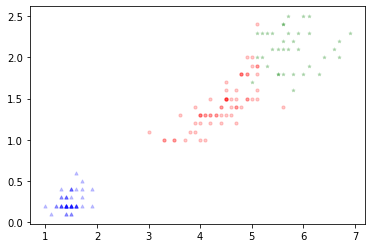

In [39]:
# 산점도 그리기 

plt.scatter(data_x[labels == 0], data_y[labels == 0], c = 'red', alpha=0.2, s=10, marker='o')
plt.scatter(data_x[labels == 1], data_y[labels == 1], c = 'blue', alpha=0.2, s=10, marker='^')
plt.scatter(data_x[labels == 2], data_y[labels == 2], c = 'green', alpha=0.2, s=10, marker='*')

Text(0.5, 1.0, 'Agg_clustering_ward')

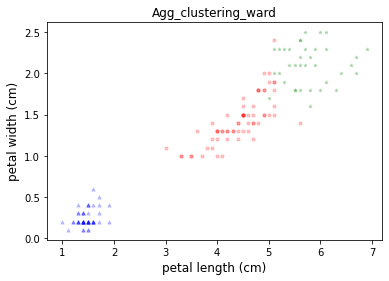

In [40]:
# 산점도 그리기 

plt.scatter(data_x[labels == 0], data_y[labels == 0], c = 'red', alpha=0.2, s=10, marker='o')
plt.scatter(data_x[labels == 1], data_y[labels == 1], c = 'blue', alpha=0.2, s=10, marker='^')
plt.scatter(data_x[labels == 2], data_y[labels == 2], c = 'green', alpha=0.2, s=10, marker='*')

# 축 라벨과 타이틀 설정 
plt.xlabel(x_label, fontsize = 'large')
plt.ylabel(y_label, fontsize = 'large')
plt.title("Agg_clustering_ward", fontsize='large')

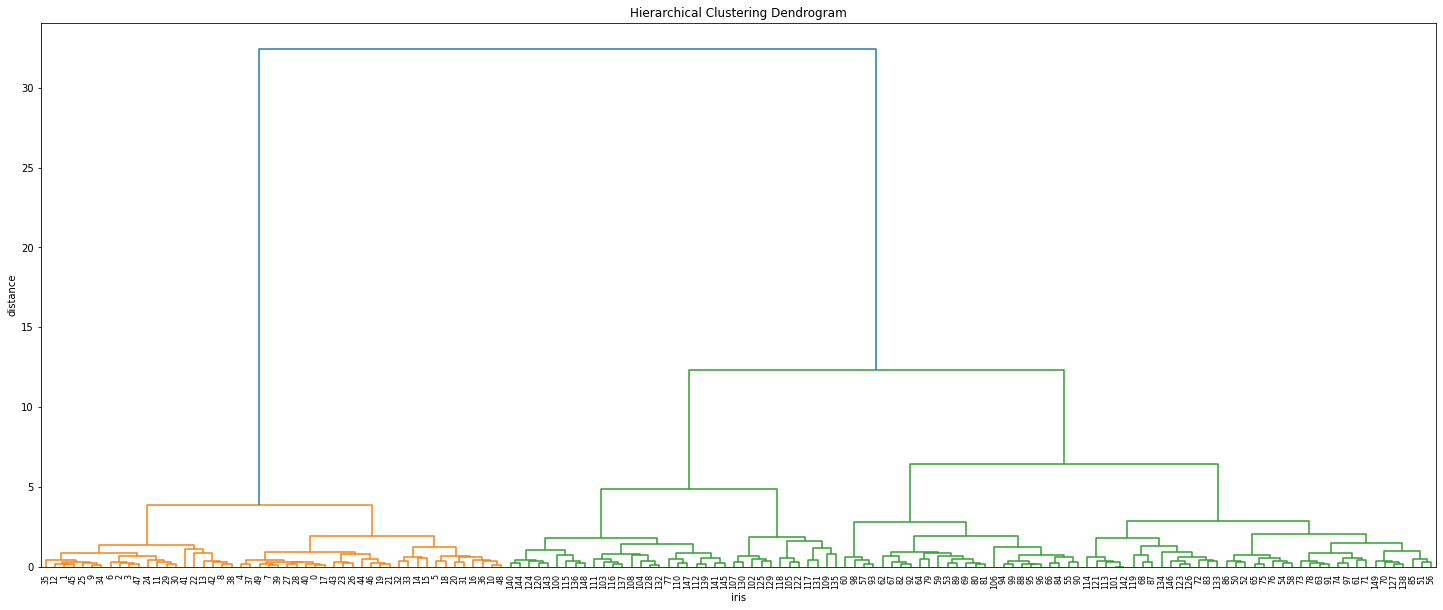

In [41]:
# 덴드로그램 

from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(data, 'ward')

plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')

dendrogram(z,
          leaf_rotation=90, # rotation the x axis lables(각도 조절)
          leaf_font_size=8)

plt.show()

In [42]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])